# A Tutorial on Analyzing and Interpreting Movies

### Authors: Akshay Anil, Atul Bharati, Chaewoon Hong
---

Welcome to our tutorial on how to analyze data on movies! This dataset was pulled from a movies database and is available on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), courtesy of The Movie Database (TMDb). It contains information on around 5000 popular movies.

In this tutorial, we will be walking you step by step in how to approach this dataset in order to get the data you want. We will be analyzing the data we collect with the help of visual graphics.

Our code is written in Python 3 on the Jupyter Notebook.

We start off by importing all the libraries that we will need in this project:
+ **pandas** - used to store our dataset in a table
+ **numpy**  - provides mathematical functions to help us analyze the data
+ **matplotlib** - allows us to graph our data
+ **warnings** - suppresses any warnings we run into
+ **re** - used for regular expressions
+ **cpi** - we will be using the inflation method to account for money value over time
+ **datetime** - used in conjunction with economics
+ **sklearn** - library for machine learning

---
If you happen to get an error like this:
> No module named 'cpi'

Simply go to the terminal and run
> pip install cpi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import cpi
import datetime
from sklearn import linear_model
warnings.filterwarnings('ignore')


For this tutorial, we downloaded the dataset from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and saved it as movie_list.csv. Even though CSV stands for Comma-Separated Values, we need to confirm that other characters such as semi-colons are not used instead. We do this by opening the file with a text editor and searching for delimiters.


![CSV Commas](commas.png)


Here we see that commas are used, so we add `sep=','` as an argument to the `read_csv` function.

Let's look at the dataset that we have. 

In [2]:
# Display the data as is from the source
movies = pd.read_csv('movie_list.csv', sep=',')

# Display the first five rows 
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We get a table with 20 columns! Let's trim down the dataset so we are left with movies that are originally in English and have already been released. We also want to remove any rows where the revenue or budget is equal to 0. 

In [3]:
# Limit movies to those that are in English and already Released for a fair comparison
movies = movies[movies.original_language == 'en']
movies = movies[movies.status == 'Released']
movies = movies[movies.budget != 0]
movies = movies[movies.revenue != 0]

# Remove columns that are not vital for analysis
movies.drop(columns=['original_language', 'status', 'keywords', 'original_title', 'overview', 'homepage', 'id', 'production_companies', 'production_countries', 'spoken_languages', 'tagline'], inplace=True)

# Remove any rows with missing data
movies.dropna(inplace=True)

Let's create some functions to split up the release date so we can analyze changes over
months, days, and years. 

In [4]:
# Functions to split up release_date
def get_year(row):
    date = row['release_date']
    y, _, _ = date.split("-")
    return int(y)
def get_month(row):
    date = row['release_date']
    _, m, _ = date.split("-")
    return int(m)
def get_day(row):
    date = row['release_date']
    _, _, d = date.split("-")
    return int(d)

In [5]:
# Create and set year, month, and day of release for each movie
movies['release_year'] = movies.apply(get_year, axis=1)
movies['release_month'] = movies.apply(get_month, axis=1)
movies['release_day'] = movies.apply(get_day, axis=1)

# Remove the release_date column because we don't need it anymore
movies.drop(columns=['release_date'], inplace=True)
movies.head()

,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,release_day
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,162.0,Avatar,7.2,11800,2009,12,10
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,880674609,148.0,Spectre,6.3,4466,2015,10,26
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012,7,16
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,284139100,132.0,John Carter,6.1,2124,2012,3,7


The value of a dollar changes over time so we should take that into consideration. Below we create two methods, one for budget and one for revenue, to update their values to what they are worth in 2018.

In [6]:
def get_current_budget(row):
    return cpi.inflate(int(row['budget']), datetime.date(row['release_year'], row['release_month'], row['release_day']),
datetime.date(2018,1,1))

def get_current_revenue(row):
    return cpi.inflate(int(row['revenue']), datetime.date(row['release_year'], row['release_month'], row['release_day']), 
datetime.date(2018,1,1))

In [7]:
# Replace existing budget and revenue values with those adjusted for inflation
movies['budget'] = movies.apply(get_current_budget, axis=1)
movies['revenue'] = movies.apply(get_current_revenue, axis=1)

movies.head()

,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,release_day
0,2.720294e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,3.200036e+09,162.0,Avatar,7.2,11800,2009,12,10
1,3.575882e+08,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,1.145474e+09,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,2.553310e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,9.178103e+08,148.0,Spectre,6.3,4466,2015,10,26
3,2.704743e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1.173793e+09,165.0,The Dark Knight Rises,7.6,9106,2012,7,16
4,2.809401e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,3.070234e+08,132.0,John Carter,6.1,2124,2012,3,7


Now let's swap some columns to make the dataframe easier to read.

In [8]:
# Swap the headers
# Budget with title
col_list = list(movies)
col_list[0], col_list[5] = col_list[5], col_list[0]
# budget with popularity 
col_list[2], col_list[5] = col_list[5], col_list[2]

# Swap the values of the columns
movies.columns = col_list
c = movies.columns
# Budget with title
movies[[c[0], c[5]]] = movies[[c[5], c[0]]]
# Budget with popularity 
movies[[c[2], c[5]]] = movies[[c[5], c[2]]]

movies.head()

,title,genres,budget,revenue,runtime,popularity,vote_average,vote_count,release_year,release_month,release_day
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.720294e+08,3.200036e+09,162.0,150.437577,7.2,11800,2009,12,10
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",3.575882e+08,1.145474e+09,169.0,139.082615,6.9,4500,2007,5,19
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.553310e+08,9.178103e+08,148.0,107.376788,6.3,4466,2015,10,26
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2.704743e+08,1.173793e+09,165.0,112.312950,7.6,9106,2012,7,16
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2.809401e+08,3.070234e+08,132.0,43.926995,6.1,2124,2012,3,7


Great! This looks like something we can work with. Let's run a quick dataframe `describe` to identify invalid data. In respect to the data we are using, none of the values should be negative (Negative runtime? What would that even look like?).

In [9]:
movies.describe()

,budget,revenue,runtime,popularity,vote_average,vote_count,release_year,release_month,release_day
count,3.101000e+03,3.101000e+03,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000
mean,5.510779e+07,1.799380e+08,110.443728,29.487855,6.287327,998.595292,2001.582070,6.998065,15.515318
std,5.321520e+07,3.014738e+08,20.718088,36.626275,0.866802,1432.789943,13.320326,3.361259,8.481223
min,8.038905e+00,8.038905e+00,41.000000,0.019984,0.000000,0.000000,1916.000000,1.000000,1.000000
25%,1.756319e+07,2.801695e+07,96.000000,10.735220,5.800000,185.000000,1998.000000,4.000000,9.000000
50%,3.780766e+07,8.468266e+07,107.000000,20.827780,6.300000,485.000000,2005.000000,7.000000,15.000000
75%,7.683416e+07,2.098860e+08,121.000000,37.817905,6.900000,1179.000000,2010.000000,10.000000,23.000000
max,4.168339e+08,7.085038e+09,338.000000,875.581305,8.500000,13752.000000,2016.000000,12.000000,31.000000


Perfect! Now let's start visualizing the data we cleaned up.

## Graphing
Tracking budget over the years might be interesting to see. However, not all years are equally represented in terms of number of movies. How do work around this problem? Unlike the mean, the maximum value is not impacted by the number of values. Let's try plotting maximum budget per year.

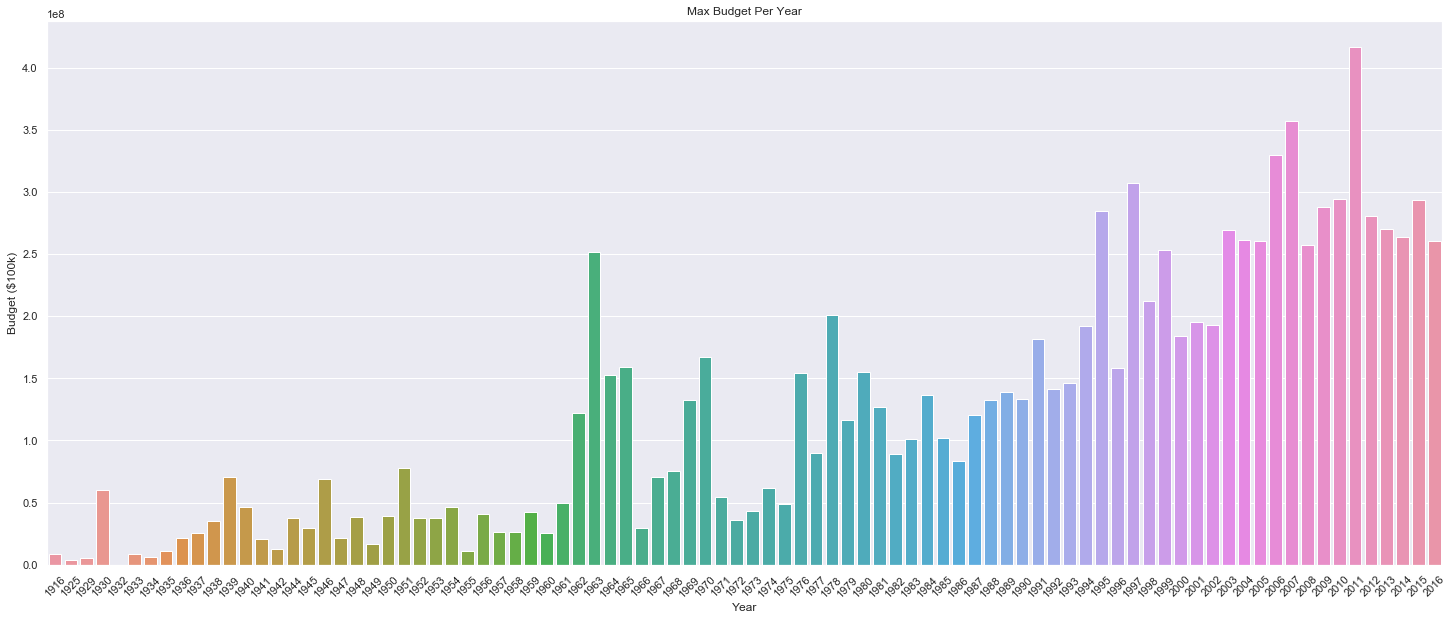

In [10]:
plt.figure(figsize=(25, 10));
# Gives us lines a background to help line up bars with their values
sns.set()
# Get the total budget and revenue per year
budget_year = movies.groupby(['release_year'])['budget'].max()
budget_year = pd.DataFrame({'release_year':budget_year.index, 'max_budget':budget_year.values})
# Plot the data
sns.barplot(budget_year['release_year'], budget_year['max_budget'])
plt.title('Max Budget Per Year')
plt.xlabel('Year')
plt.ylabel('Budget ($100k)')
plt.xticks(rotation=45)
plt.show()

The plot shows how the budget for movies has clearly risen over the years. This could perhaps be explained by the advancement of technology and the incorporation of high quality sets.

## Looking at the Genres 

Next we'll be looking at the genres of the movies and take a look at the average rating per genre. We'll be using the same movies variable because it contains all the columns that we will be needing. 

In [11]:
# The format of the genres column is a string that looks like this: 
# [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]
# We only want the genres after "name":, so we will use regex to eliminate the other characters. 

# Iterate through the rows
for index,row in movies.iterrows():
    # Initialize a new string - this will replace the row value for genre to make it easier to read and extract
    display_genres = ""
    # Isolates the name: (genre) from the ids
    g = re.findall(r"name\": \"\w+", row['genres'])
    # g should now look like this: 
    # ['name": "Action', 'name": "Adventure', 'name": "Fantasy', 'name": "Science']
    
    # Iterate through each item in g and remove everything but the genres
    for item in g:
        remove = re.search("name\": \"", item)
        display_genres += (item[:remove.start()] + item[remove.end():]) + " "
    display_genres = display_genres[:-1]
        
    # Replace the genre value with the new string 
    movies.at[index, 'genres'] = display_genres        
movies.head()

,title,genres,budget,revenue,runtime,popularity,vote_average,vote_count,release_year,release_month,release_day
0,Avatar,Action Adventure Fantasy Science,2.720294e+08,3.200036e+09,162.0,150.437577,7.2,11800,2009,12,10
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,3.575882e+08,1.145474e+09,169.0,139.082615,6.9,4500,2007,5,19
2,Spectre,Action Adventure Crime,2.553310e+08,9.178103e+08,148.0,107.376788,6.3,4466,2015,10,26
3,The Dark Knight Rises,Action Crime Drama Thriller,2.704743e+08,1.173793e+09,165.0,112.312950,7.6,9106,2012,7,16
4,John Carter,Action Adventure Science,2.809401e+08,3.070234e+08,132.0,43.926995,6.1,2124,2012,3,7


In [12]:
# Get all the possible genres from the dataset
# the keys of the genres dict will have the genre names and the values will be the sum of the average ratings for that
# particular genre
genres = {}
# average_counter is a dict that will have the same keys as genres dict but its values will be the number of average ratings
average_counter = {}

for index, row in movies.iterrows():
    list_of_genres = re.split(" ", row['genres'])
    for item in list_of_genres:
        if item not in genres and item != '':
            # Initialize the keys as 0/1 first 
            genres[item] = 0
            genres[item] += row['vote_average']
            average_counter[item] = 1
        elif item != '':
            genres[item] += row['vote_average']
            average_counter[item] += 1

# Displayed below are all the possible genres (keys) from this dataset
genres

{'Action': 5368.999999999996,
 'Adventure': 3971.599999999998,
 'Fantasy': 2018.7000000000003,
 'Science': 2551.800000000002,
 'Crime': 3248.700000000001,
 'Drama': 8956.39999999999,
 'Thriller': 5649.700000000002,
 'Animation': 1103.6999999999998,
 'Family': 2193.4,
 'Western': 350.69999999999993,
 'Comedy': 6565.5,
 'Romance': 3506.0000000000045,
 'Horror': 1902.8000000000006,
 'Mystery': 1648.3000000000002,
 'History': 869.6999999999999,
 'War': 707.9000000000001,
 'Music': 717.1999999999995,
 'Documentary': 238.59999999999997,
 'Foreign': 24.9}

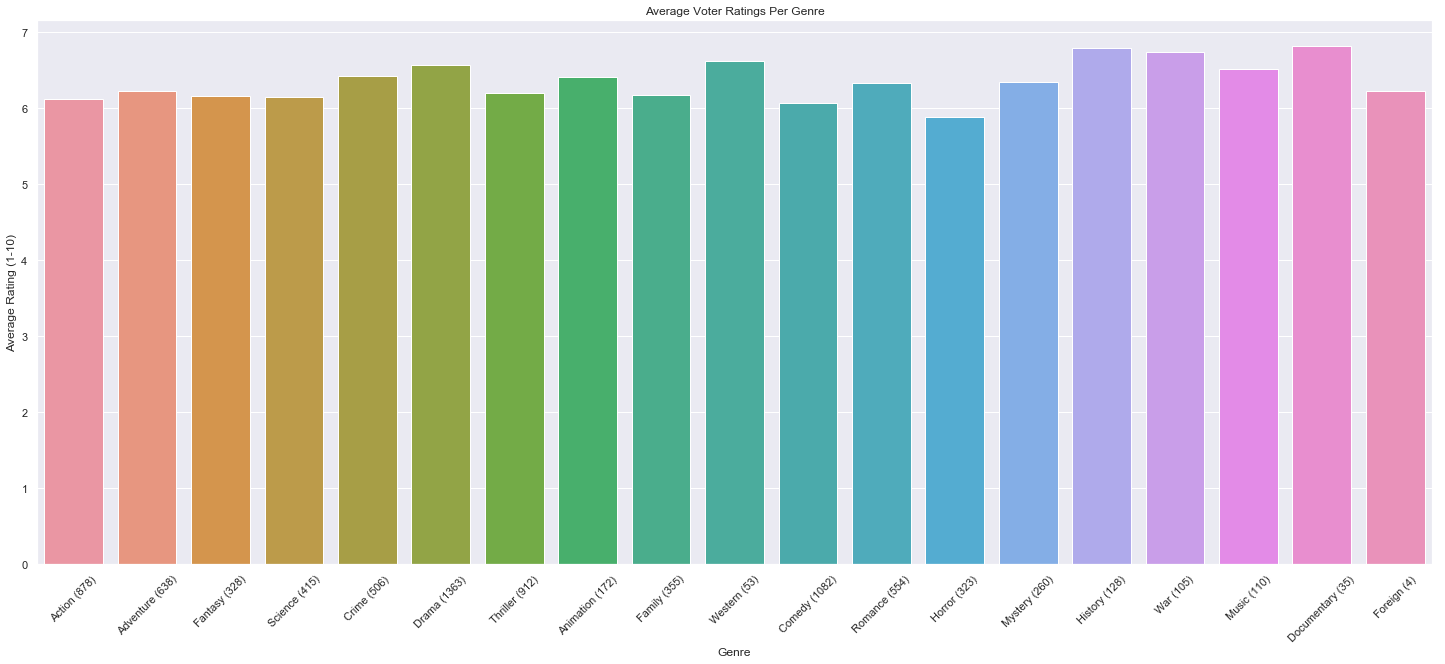

In [13]:
# Include the average ratings
average_ratings = []
for (sum, denom) in zip(genres.values(), average_counter.values()):
    if denom != 0:
        average_ratings.append(sum/denom)
    else:
        average_ratings.append(0)

# Include the number of movies
xvals = []
for (genre, count) in zip(genres.keys(), average_counter.values()):
    xvals.append(genre + " (" + str(count) + ")")
    
plt.figure(figsize=(25, 10))
sns.barplot(xvals, average_ratings)
plt.title('Average Voter Ratings Per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating (1-10)')
plt.xticks(rotation=45)
plt.show()

It is quite difficult to compare each genre's ratings with the other ratings, so let's sort the histograms. We'll be doing a lot of sorting in this tutorial so let's create a function for sorting. 

In [14]:
def sort_graph(xlist, ylist):
    # initialize to_sort as a dict. The keys will be the xlist (where order doesn't matter like genre names / movie titles)
    # and the values will be the ylist (ex. average  budget, avarege rating). 
    # When we sort the ratings (values), the movie names (keys) will still remain with its rating value. 
    to_sort = {}
    for (x,y) in zip(xlist,ylist):
        to_sort[y] = x

    # sort the values
    sorted_by_value = sorted(to_sort.items(), key=lambda kv: kv[1])

    xout = []
    yout = []
    for (x, y) in sorted_by_value:
        xout.append(x)
        yout.append(y)
        
    return xout,yout

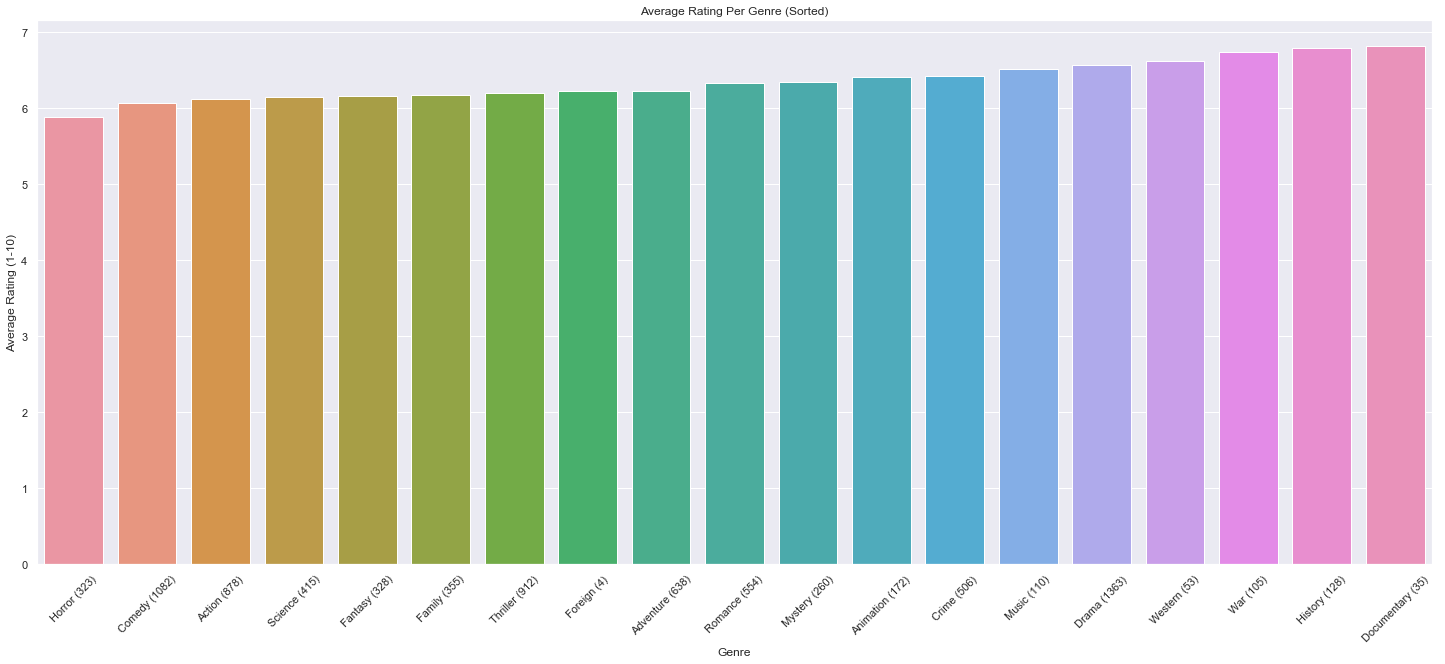

In [15]:
genres,ratings = sort_graph(average_ratings,xvals)

plt.figure(figsize=(25, 10))
sns.barplot(genres, ratings)
plt.title('Average Rating Per Genre (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Average Rating (1-10)')
plt.xticks(rotation=45)
plt.show()

From this graph, we can see that the horror genre seems to have the lowest average ratings compared to the other genres. The reason we put the number of movies in parenthesis next to the genre titles is that some genres have smaller samples which means the average ratings for a particular genre may not be a true representation of the population.

For example, the "Foreign" genre had only one movie with a rating of 6.9. Even if the Foreign genre only has one movie, if it was plotted on the graph, it would seem like the Foreign genre has the highest average rating out of all other genres. For this very reason, we removed the Foreign genre from the graph and put the number of movies in parenthesis as a precaution. 

## Taking a Closer Look

Now that we have cleaned up the genres column, let's take a closer look into the Horror genre. Compared to the other genres, the Horror genre has a significantly lower average rating than the other genres. First, let's plot the horror movies individually to see their ratings.

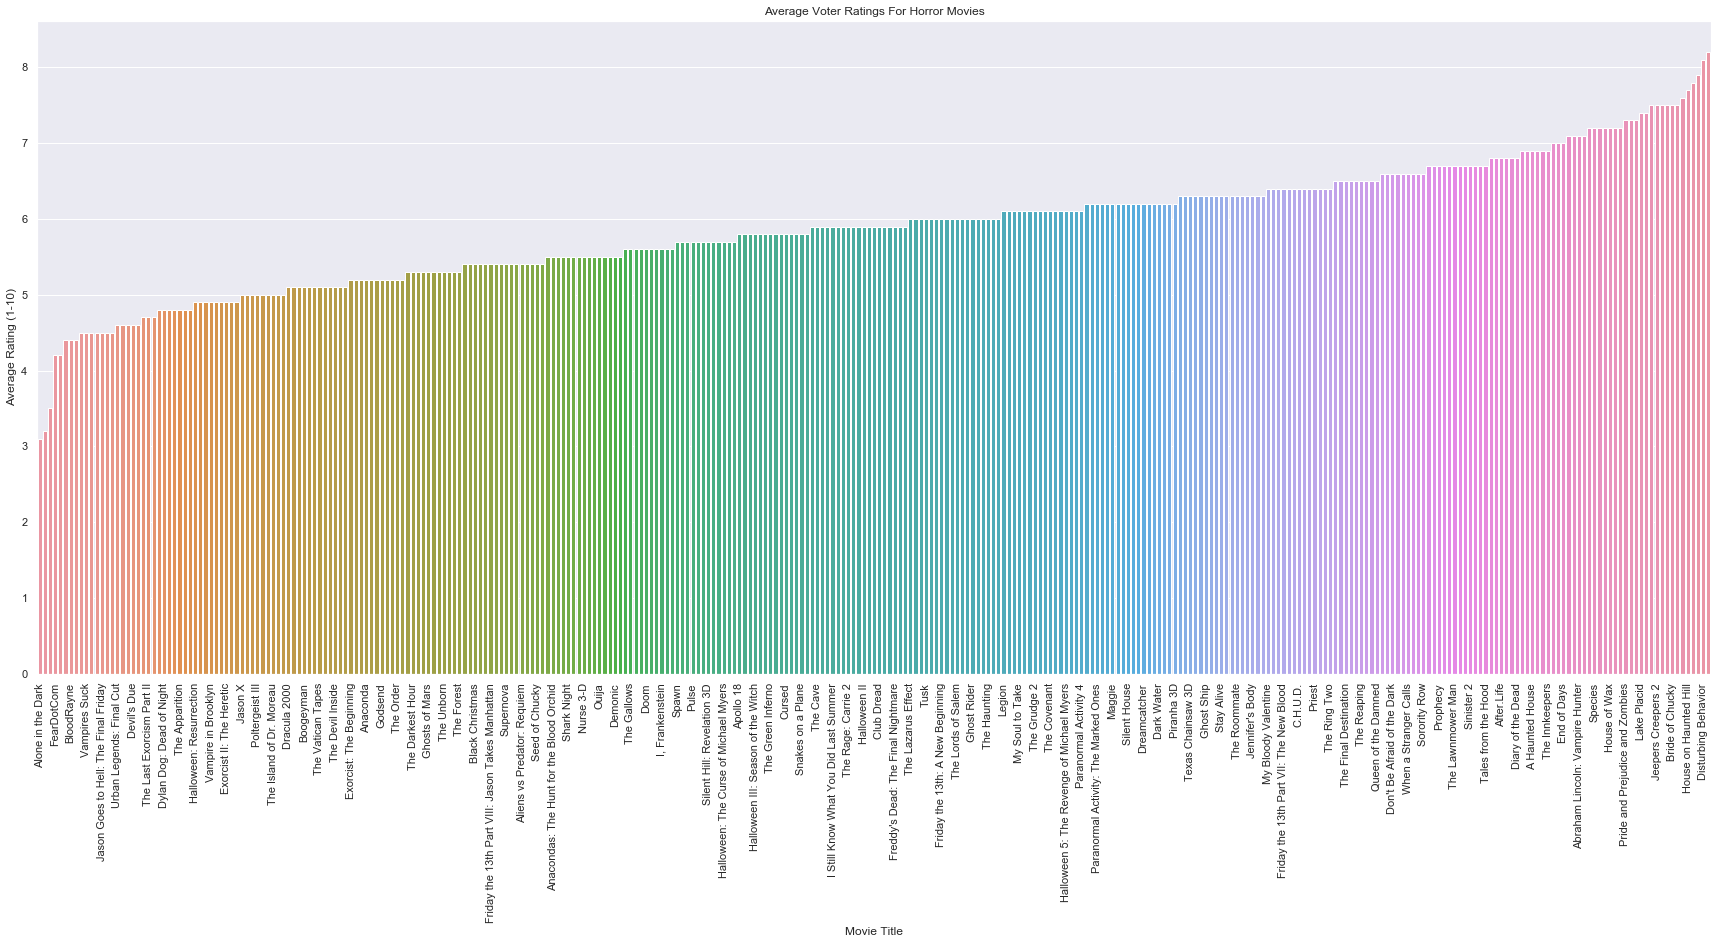

(Every 3rd Movie Label is labelled for ease of read)


In [16]:
horror_title = []
horror_rating = []
for index, row in movies.iterrows():
    if 'Horror' in row['genres']:
        horror_title.append(row['title'])
        horror_rating.append(row['vote_average'])

titles,ratings = sort_graph(horror_rating,horror_title)

plt.figure(figsize=(30, 12))
sns.barplot(titles, ratings)
plt.title('Average Voter Ratings For Horror Movies')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating (1-10)')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(horror_title),3))
plt.show()
print("(Every 3rd Movie Label is labelled for ease of read)")

Perhaps the reason the horror movies have lower ratings than all other genres is because of the budgets. Let's look at the average budget for each genre to see if it plays a role in the low ratings. We'll use code that is very similar to the one we used previously to find the average ratings.

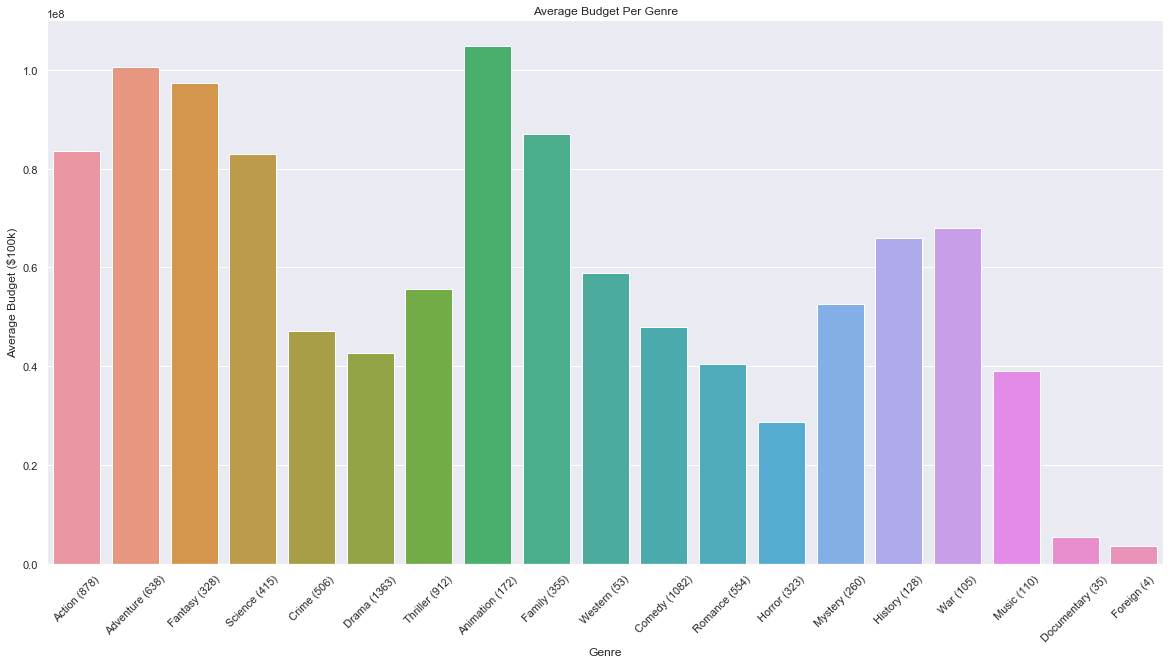

In [17]:
# the keys of the dict will have the genre names and the values will be the sum of the budgets for that particular genre
genres = {}
# average_counter is a dict that will have the same keys as genres but its values will be the number of values
average_counter = {}

for index, row in movies.iterrows():
    list_of_genres = re.split(" ", row['genres'])
    for item in list_of_genres:
        if item not in genres and item != '':
            # Initialize the keys as 0/1 first 
            genres[item] = 0
            genres[item] += row['budget']
            average_counter[item] = 1
        elif item != '':
            genres[item] += row['budget']
            average_counter[item] += 1

# Include the average budgets
average_budget = []
for (sum, denom) in zip(genres.values(), average_counter.values()):
    if denom != 0:
        average_budget.append(sum/denom)
    else:
        average_budget.append(0)

# Include the number of movies
xvals = []
for (genre, count) in zip(genres.keys(), average_counter.values()):
    xvals.append(genre + " (" + str(count) + ")")
    
plt.figure(figsize=(20, 10))
sns.barplot(xvals, average_budget)
plt.title('Average Budget Per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Budget ($100k)')
plt.xticks(rotation=45)
plt.show()

Since the values in the x-axis (genres) don't have a particular order, let's reorder the genres so we can easily look at how the genres are related to each other when it comes to average budget. 

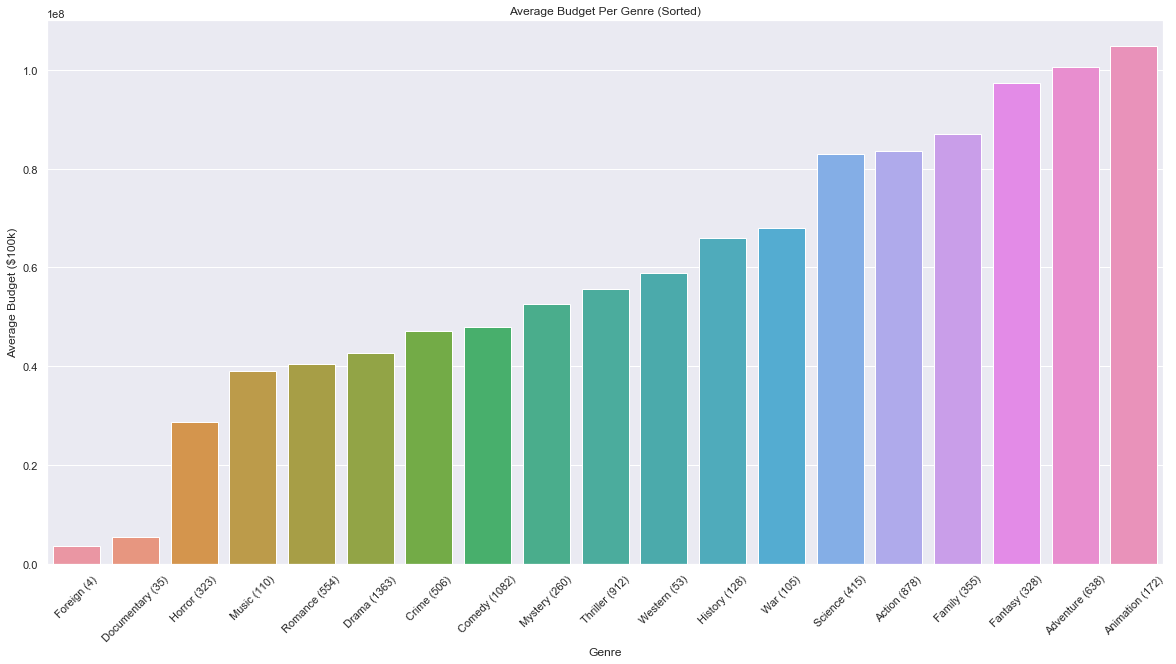

In [18]:
genres,budgets = sort_graph(average_budget,xvals)
    
plt.figure(figsize=(20, 10))
sns.barplot(genres, budgets)
plt.title('Average Budget Per Genre (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Average Budget ($100k)')
plt.xticks(rotation=45)
plt.show()

Again, the horror genre is near last when it comes to its budget. Now let's see the relationship between the average rating and average budget for each genre.

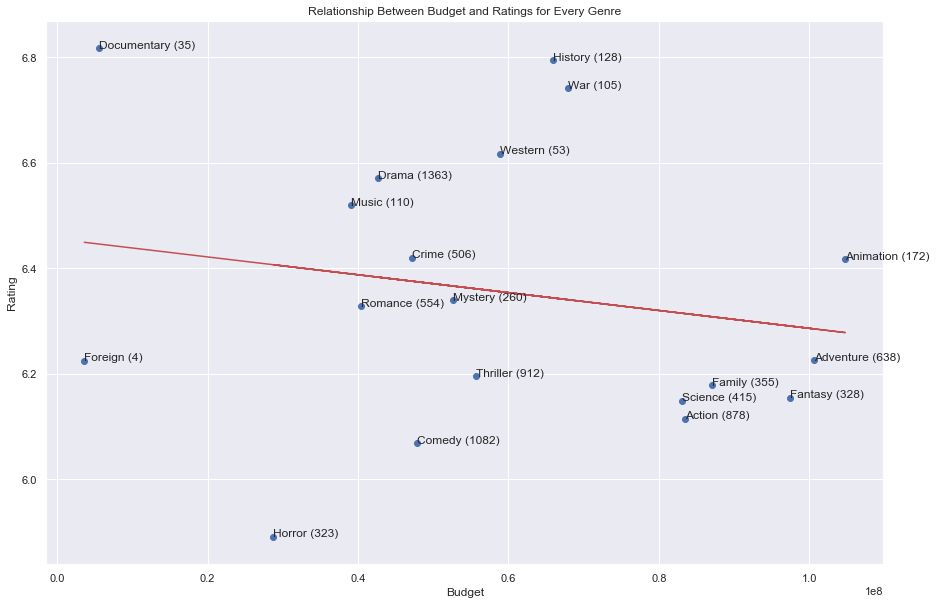

In [19]:
plt.figure(figsize=(15, 10))
plt.scatter(average_budget, average_ratings)
plt.title('Relationship Between Budget and Ratings for Every Genre')
plt.xlabel('Budget')
plt.ylabel('Rating')

for i in range(len(average_budget)):
    plt.text(average_budget[i], average_ratings[i], xvals[i], fontsize=12)
    
# Draw the regression line
# m = slope, b = y-intercept
m, b = np.polyfit(average_budget, average_ratings, 1)

# Calculate y=mx+b for each point and then create regression line
yvals = []
index = 0
for y in average_ratings:
    yvals.append(m*average_budget[index]+b)
    index += 1
plt.plot(average_budget, yvals , 'r')
plt.show()

Looking at the regression line, although for the horror genre it seems that budget and rating go hand in hand, the line is more horizontal than vertical but has a slightly negative slope. This implies that there's actually not much of a correlation, or relationship, between the budget of a film and the average voter rating.

In [20]:
horror_movies = movies[movies['genres'].str.contains("Action")]
horror_movies.head()

,title,genres,budget,revenue,runtime,popularity,vote_average,vote_count,release_year,release_month,release_day
0,Avatar,Action Adventure Fantasy Science,2.720294e+08,3.200036e+09,162.0,150.437577,7.2,11800,2009,12,10
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,3.575882e+08,1.145474e+09,169.0,139.082615,6.9,4500,2007,5,19
2,Spectre,Action Adventure Crime,2.553310e+08,9.178103e+08,148.0,107.376788,6.3,4466,2015,10,26
3,The Dark Knight Rises,Action Crime Drama Thriller,2.704743e+08,1.173793e+09,165.0,112.312950,7.6,9106,2012,7,16
4,John Carter,Action Adventure Science,2.809401e+08,3.070234e+08,132.0,43.926995,6.1,2124,2012,3,7


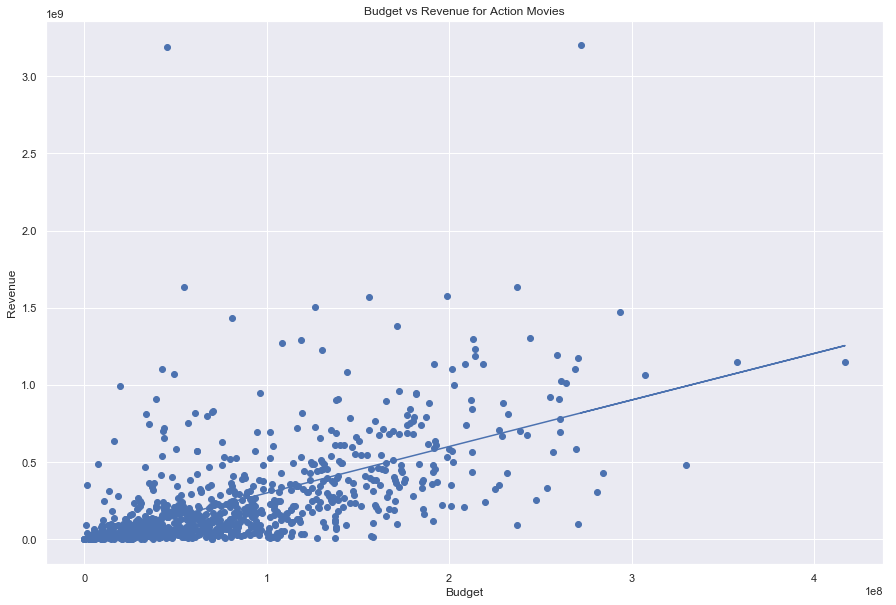

In [21]:
plt.figure(figsize=(15, 10))
plt.scatter(horror_movies['budget'], horror_movies['revenue'])
plt.title('Budget vs Revenue for Action Movies')
plt.xlabel('Budget')
plt.ylabel('Revenue')

reg = linear_model.LinearRegression()
X = [[budget] for budget in horror_movies['budget'].values]
y = [[revenue] for revenue in horror_movies['revenue'].values]
reg_model = reg.fit(X, y)

plt.plot(X, reg_model.predict(X))

In [22]:
print(reg_model.predict([[150000000]]))

[[4.49349557e+08]]
